# Задание 10
## 10.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$y_1 = y'$

Тогда система имеет вид:

$y_1 = y'$

$y_1' = a^2y$

$y(0) = 1$

$y_1(0) = -a$

## 10.2

In [2]:
def euler_method(T, N, a):
    y = [1]
    y1 = [-a]
    h = T / N
    for i in range(N):
        next_y = y[-1] + h * y1[-1]
        next_y1 = y1[-1] + h * a * a * y[-1]
        y.append(next_y)
        y1.append(next_y1)
    return y

In [21]:
def plot_solution_a_1():
    N = [10, 50, 100]
    T = 10
    a = [1]
    for n in N:
        h = T / n
        x = [i * h for i in range(n + 1)]
        for i in a:
            y = euler_method(T, n, i)
            plt.plot(x, y, label='N=' + str(n) + ' a=' + str(i))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Solution')
    plt.legend()
    plt.show()  

In [28]:
def plot_solution_a_20():
    N = [10, 50, 100]
    T = 10
    a = [np.sqrt(20)]
    for n in N:
        h = T / n
        x = [i * h for i in range(n + 1)]
        for i in a:
            y = euler_method(T, n, i)
            plt.plot(x, y, label='N=' + str(n) + ' a=' + str(i))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Solution')
    plt.legend()
    plt.show()  

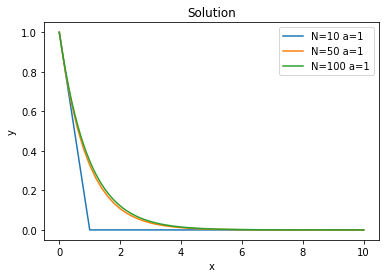

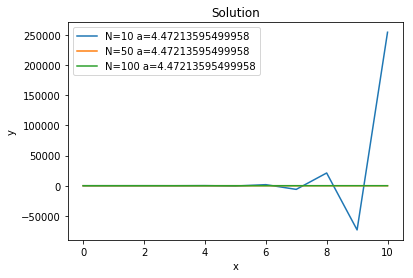

In [29]:
plot_solution_a_1()
plot_solution_a_20()

Видим, что для $a=1$ с ростом $N$ растёт точность приближения к ответу -- $e^{-ax}$, для $a = \sqrt{20}$ видно, что при $N =10$ не хватает скорее всего ни точности  в вычислениях, ни количества интервалов. 

## 10.3

Точное решение системы:

$\lambda^2 = a^2 \Rightarrow \lambda = \pm a \Rightarrow y = c_1e^{-ax} + c_2e^{ax}$

$y(0) = 1, y'(0) = -a \Rightarrow y = e^{-ax}$

In [38]:
def u(a, x):
    return np.exp(-a * x)

In [39]:
def euler_method_difference(T, N, a):
    y = [1]
    y1 = [-a]
    h = T / N
    for i in range(N):
        next_y = y[-1] + h * y1[-1]
        next_y1 = y1[-1] + h * a * a * y[-1]
        y.append(next_y)
        y1.append(next_y1)
    return [abs(y[i] - u(a, i * h)) for i in range(N + 1)]

In [81]:
def plot_difference():
    N = range(1, 201)
    a = 1
    T = 10
    errors1 = [np.log10(max(euler_method_difference(T, n, a))) for n in N]
    errors20 = [np.log10(max(euler_method_difference(T, n, np.sqrt(20)))) for n in N]
    plt.plot(N, errors1, label='a=1')
    plt.plot(N, errors20, label='a=sqrt(20)')
    plt.xlabel('N')
    plt.ylabel('log(error)')
    plt.title('Max difference')
    plt.legend()
    plt.show() 

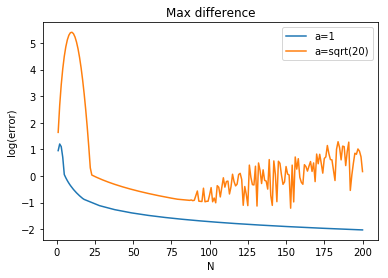

In [82]:
plot_difference()

Точность в $10^{-3}$ не достигается, с какого то момента для $a=\sqrt{20}$ погрешность станвится слишком большая. Скорость убывания ошибки, как видно, со временем превращается в прямую, что говорит нам о степенном убывании.

## 10.4

In [132]:
def runge_kutta_method_difference(T, N, a):
    
    def f1(y):
        return a ** 2 * y
    
    y = [1]
    y1 = [-a]
    h = T / N
    beta = 1 / 2
    for i in range(N):
        next_y = y[-1] + h * ((1 - beta) * y1[-1] + 
                              beta * (y1[-1] + h / (2 * beta) * f1(y[-1])))
        next_y1 = y1[-1] + h * ((1 - beta) * f1(y[-1]) + 
                                beta * f1(y[-1] + h / (2 * beta) * y1[-1]))
        y.append(next_y)
        y1.append(next_y1)
    return [abs(y[i] - u(a, i * h)) for i in range(N + 1)]

In [133]:
def plot_difference():
    N = range(1, 501)
    a = 1
    T = 10
    errors1 = [np.log10(max(runge_kutta_method_difference(T, n, a))) for n in N]
    errors20 = [np.log10(max(runge_kutta_method_difference(T, n, np.sqrt(20)))) for n in N]
    plt.plot(N, errors1, label='a=1')
    plt.plot(N, errors20, label='a=sqrt(20)')
    plt.xlabel('N')
    plt.ylabel('log(error)')
    plt.title('Max difference')
    plt.legend()
    plt.show() 

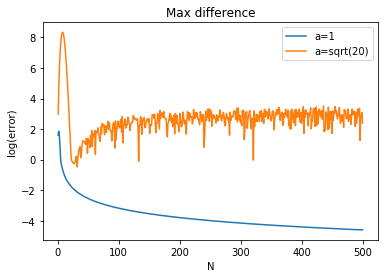

In [134]:
plot_difference()

Точность в $10^{-3}$ достигается только для $a = 1$ начиная с $N \approx 75$, так же видно, что ошибка убывает не медленее чем степенным образом, что согласуется с лекцией.Для $a = \sqrt{20}$ всё грустно, видимо не хватает точности при вычислении начиная с $N \approx 50$

In [135]:
def plot_compare():
    N = range(1, 201)
    a = 1
    T = 10
    errors_runge = [np.log10(max(runge_kutta_method_difference(T, n, a))) for n in N]
    errors_euler = [np.log10(max(euler_method_difference(T, n, a))) for n in N]
    plt.plot(N, errors_runge, label='runge-kutta')
    plt.plot(N, errors_euler, label='euler')
    plt.xlabel('N')
    plt.ylabel('log(error)')
    plt.title('Max difference, a = 1')
    plt.legend()
    plt.show() 

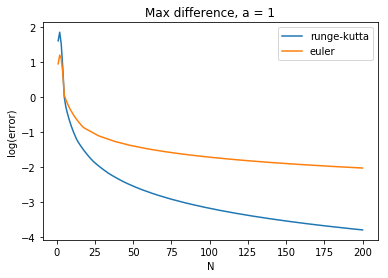

In [136]:
plot_compare()

Как видим, Рунге-Кутта на 2 порядка точнее.

In [137]:
def plot_compare():
    N = range(1, 201)
    a = np.sqrt(20)
    T = 10
    errors_runge = [np.log10(max(runge_kutta_method_difference(T, n, a))) for n in N]
    errors_euler = [np.log10(max(euler_method_difference(T, n, a))) for n in N]
    plt.plot(N, errors_runge, label='runge-kutta')
    plt.plot(N, errors_euler, label='euler')
    plt.xlabel('N')
    plt.ylabel('log(error)')
    plt.title('Max difference, a = sqrt(20)')
    plt.legend()
    plt.show() 

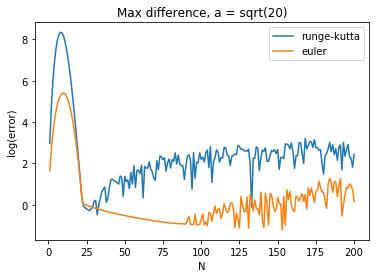

In [138]:
plot_compare()

При вычислении погрешность быстрее влияет на Рунге-Кутта, уже при $N=25$, что не удивительно, так как там есть множитель $a^2$ при обновлении как $y$, так и $y'$, в то время как в Эйлере он есть только в обновлениии $y'$